# Bank Loan Prediction 

# Aim:
To develop a predictive model that accurately predicts whether a loan applicant will be approved or denied based on various features such as credit score, annual income, loan amount, credit history, etc.

# Load libraries and dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Importing Dataset:

In [2]:
df = pd.read_csv(r"Bank_loan1.csv")
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5.0,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070,Short Term,725.0,475437.0,7.0,Own Home,other,2202.86,22.3,NaN,5,0,47766,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999,Short Term,732.0,1289416.0,1.0,Rent,Debt Consolidation,13109.05,9.4,21.0,22,0,153045,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136,Short Term,742.0,1150545.0,6.0,Rent,Debt Consolidation,7315.57,18.8,18.0,12,1,109554,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332,Short Term,746.0,1717524.0,9.0,Rent,Debt Consolidation,9890.07,15.0,NaN,8,0,404225,738254.0,0.0,0.0


#    Features Description:

1	Loan ID = 	                          	Unique identifier for each loan.

2	Customer ID =                         Unique identifier for each customer.	

3	Loan Status = 	                        The status of the loan (e.g., "Fully Paid," "Charged Off," etc.)

4	Current Loan Amount = 	                The current amount of the loan.						

5	Term =                             The term (duration) of the loan.						

6	Credit Score = 	 	                The credit score of the customer.						

7	Annual Income = 	                The annual income of the customer.						

8	Years in current job = 	            The number of years the customer has been in their current job.					

9	Home Ownership = 	                The type of home ownership (e.g., "Own Home," "Mortgage," "Rent").					

10	Purpose	= 	                        The purpose of the loan.						

11	Monthly Debt = 		                The monthly debt payments of the customer.						

12	Years of Credit History	=             The number of years of credit history.						

13	Months since last delinquent =  	    The number of months since the customer's last delinquency.						

14	Number of Open Accounts	=              The number of open credit accounts the customer has.						

15	Number of Credit Problems =  	        The number of credit problems the customer has.						

16	Current Credit Balance =   	            The current total balance on all credit accounts.						

17	Maximum Open Credit =  	                The maximum open credit the customer has.						

18	Bankruptcies = 	                     The number of bankruptcies the customer has filed.						

19	Tax Liens =  	                        The number of tax liens the customer has.						


# EDA process part in Dataset:

In [3]:
#info() refers to a method used to retrieve concise information about a DataFrame.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  int64  
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   float64
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

# As Loan ID and Customer ID have unique value which do not having dependency 

In [5]:
# drop() removes columns named 'Column_A' and 'Column_B' from the DataFrame df. 

In [6]:
df=df.drop(['Loan ID','Customer ID'],axis=1)

In [7]:
df

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,Fully Paid,262328,Short Term,NaN,NaN,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,Fully Paid,99999999,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,Fully Paid,347666,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,Fully Paid,176220,Short Term,NaN,NaN,5.0,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Fully Paid,147070,Short Term,725.0,475437.0,7.0,Own Home,other,2202.86,22.3,NaN,5,0,47766,658548.0,0.0,0.0
99996,Fully Paid,99999999,Short Term,732.0,1289416.0,1.0,Rent,Debt Consolidation,13109.05,9.4,21.0,22,0,153045,509234.0,0.0,0.0
99997,Fully Paid,103136,Short Term,742.0,1150545.0,6.0,Rent,Debt Consolidation,7315.57,18.8,18.0,12,1,109554,537548.0,1.0,0.0
99998,Fully Paid,530332,Short Term,746.0,1717524.0,9.0,Rent,Debt Consolidation,9890.07,15.0,NaN,8,0,404225,738254.0,0.0,0.0


In [8]:
# isnull().sum() is used to count the number of missing values (NaN or null values) in each column of a DataFrame.

In [9]:
df.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [10]:
#describe()is a method used to generate descriptive statistics of the numerical columns in a DataFrame

In [11]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,95778.000000,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,5.892355,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,3.631021,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,3.000000,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,6.000000,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,10.000000,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,10.000000,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


# replacing null value with mean: 

In [12]:
null_list=["Credit Score","Annual Income","Years in current job"]

In [13]:
for i in null_list:
    df[i].replace(np.nan,df[i].mean(),inplace=True)


In [14]:
zero_list=["Months since last delinquent","Maximum Open Credit","Bankruptcies","Tax Liens"]

In [15]:
for i in zero_list:
    df[i].replace(np.nan,0,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   100000 non-null  object 
 1   Current Loan Amount           100000 non-null  int64  
 2   Term                          100000 non-null  object 
 3   Credit Score                  100000 non-null  float64
 4   Annual Income                 100000 non-null  float64
 5   Years in current job          100000 non-null  float64
 6   Home Ownership                100000 non-null  object 
 7   Purpose                       100000 non-null  object 
 8   Monthly Debt                  100000 non-null  float64
 9   Years of Credit History       100000 non-null  float64
 10  Months since last delinquent  100000 non-null  float64
 11  Number of Open Accounts       100000 non-null  int64  
 12  Number of Credit Problems     100000 non-null

# Visualization:

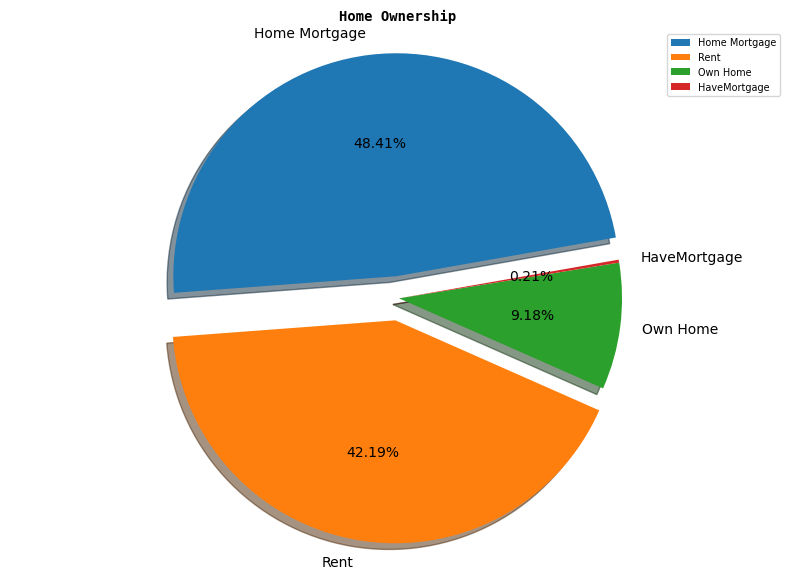

In [17]:
home_Ownership = df['Home Ownership'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(home_Ownership.values, labels=home_Ownership.index, startangle=10, explode=(0.10,0.10,0,0),
        shadow=True, autopct='%1.2f%%')
plt.title('Home Ownership', fontdict={ 'fontname': 'Monospace', 'fontsize': 10, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()




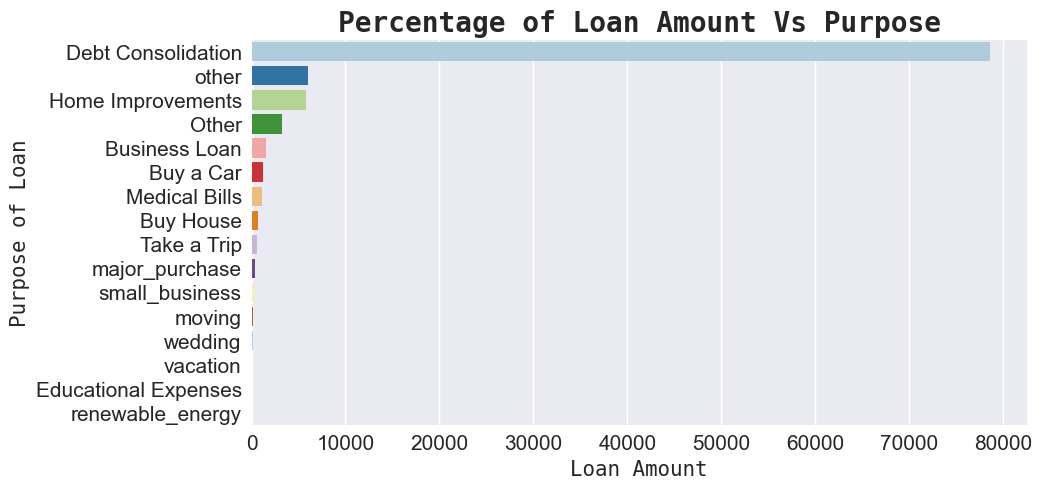

In [18]:
purpose = df['Purpose'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(x=purpose.values, y=purpose.index, palette='Paired')
plt.title('Percentage of Loan Amount Vs Purpose', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Loan Amount', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Purpose of Loan', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=15)
plt.show()

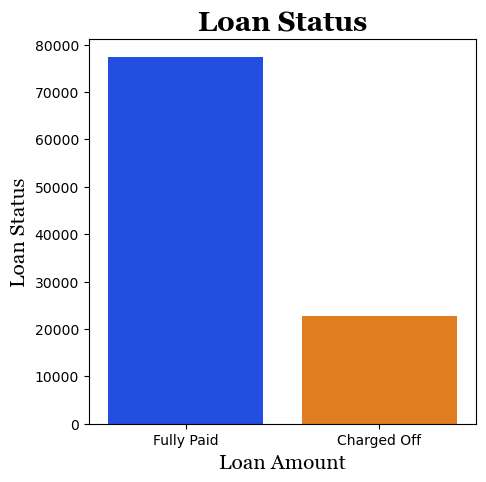

In [19]:
Loan_Status = df['Loan Status'].value_counts()
plt.style.use('default')
plt.figure(figsize=(5, 5))
sns.barplot(x=Loan_Status.index, y=Loan_Status.values, palette='bright')
plt.title('Loan Status', fontdict={'fontname': 'Georgia', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Loan Amount', fontdict={'fontname': 'Georgia', 'fontsize': 15})
plt.ylabel('Loan Status', fontdict={'fontname': 'Georgia', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()
# The Data is imbalanced need to sampling 

In [20]:
#Separting Numeric and category Data

In [21]:
df_num=df.select_dtypes(["int","float"])
df_num

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412,709.000000,1.167493e+06,8.000000,5214.74,17.2,0.0,6,1,228190,416746.0,1.0,0.0
1,262328,1076.456089,1.378277e+06,10.000000,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,99999999,741.000000,2.231892e+06,8.000000,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,347666,721.000000,8.069490e+05,3.000000,8741.90,12.0,0.0,9,0,256329,386958.0,0.0,0.0
4,176220,1076.456089,1.378277e+06,5.000000,20639.70,6.1,0.0,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,147070,725.000000,4.754370e+05,7.000000,2202.86,22.3,0.0,5,0,47766,658548.0,0.0,0.0
99996,99999999,732.000000,1.289416e+06,1.000000,13109.05,9.4,21.0,22,0,153045,509234.0,0.0,0.0
99997,103136,742.000000,1.150545e+06,6.000000,7315.57,18.8,18.0,12,1,109554,537548.0,1.0,0.0
99998,530332,746.000000,1.717524e+06,9.000000,9890.07,15.0,0.0,8,0,404225,738254.0,0.0,0.0


In [22]:
df_cat=df.select_dtypes(["object"])
df_cat

,Loan Status,Term,Home Ownership,Purpose
0,Fully Paid,Short Term,Home Mortgage,Home Improvements
1,Fully Paid,Short Term,Home Mortgage,Debt Consolidation
2,Fully Paid,Short Term,Own Home,Debt Consolidation
3,Fully Paid,Long Term,Own Home,Debt Consolidation
4,Fully Paid,Short Term,Rent,Debt Consolidation
...,...,...,...,...
99995,Fully Paid,Short Term,Own Home,other
99996,Fully Paid,Short Term,Rent,Debt Consolidation
99997,Fully Paid,Short Term,Rent,Debt Consolidation
99998,Fully Paid,Short Term,Rent,Debt Consolidation


# Using Label Encoder for converting category data into numeric:

In [23]:
from sklearn.preprocessing import LabelEncoder


In [24]:
le=LabelEncoder()

In [25]:
for i in df_cat:
    df_cat[i]=le.fit_transform(df_cat[i])
df_cat

,Loan Status,Term,Home Ownership,Purpose
0,1,1,1,5
1,1,1,1,3
2,1,1,2,3
3,1,0,2,3
4,1,1,3,3
...,...,...,...,...
99995,1,1,2,11
99996,1,1,3,3
99997,1,1,3,3
99998,1,1,3,3


# Scaling:

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc=StandardScaler()

In [28]:
x_scaled=sc.fit_transform(df_num)
x_scaled

array([[-3.56000265e-01, -2.76992475e-01, -2.16790263e-01, ...,
        -4.10331153e-02,  2.51350301e+00, -1.13530547e-01],
       [-3.61760561e-01,  1.71396798e-16, -2.39465623e-16, ...,
         1.07343479e-02, -3.34659042e-01, -1.13530547e-01],
       [ 2.77624441e+00, -2.52870520e-01,  8.77940937e-01, ...,
        -1.27536775e-03, -3.34659042e-01, -1.13530547e-01],
       ...,
       [-3.66769153e-01, -2.52116709e-01, -2.34221231e-01, ...,
        -2.66251301e-02,  2.51350301e+00, -1.13530547e-01],
       [-3.53328462e-01, -2.49101465e-01,  3.48914981e-01, ...,
        -2.68704068e-03, -3.34659042e-01, -1.13530547e-01],
       [ 2.77624441e+00, -2.51362898e-01, -4.55723492e-01, ...,
        -7.98829841e-02,  2.51350301e+00, -1.13530547e-01]])

In [29]:
df_scaled=pd.DataFrame(data=x_scaled,columns=df_num.columns)
df_scaled

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,-0.356000,-2.769925e-01,-2.167903e-01,0.593114,-1.088932,-0.142423,-0.710342,-1.023690,1.722987,-0.176642,-0.041033,2.513503,-0.113531
1,-0.361761,1.713968e-16,-2.394656e-16,1.155935,1.217548,0.413505,-0.362868,4.764912,-0.348683,-0.171894,0.010734,-0.334659,-0.113531
2,2.776244,-2.528705e-01,8.779409e-01,0.593114,0.881165,-0.470279,0.549252,1.371593,1.722987,0.008928,-0.001275,-0.334659,-0.113531
3,-0.359076,-2.679467e-01,-5.876087e-01,-0.813940,-0.799225,-0.883662,-0.710342,-0.424869,-0.348683,-0.101838,-0.044586,-0.334659,-0.113531
4,-0.364470,1.713968e-16,-2.394656e-16,-0.251118,0.178012,-1.724682,-0.710342,0.772772,-0.348683,-0.109465,-0.039789,-0.334659,-0.113531
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.365387,-2.649315e-01,-9.285678e-01,0.311703,-1.336316,0.584560,-0.710342,-1.223297,-0.348683,-0.656278,-0.012194,-0.334659,-0.113531
99996,2.776244,-2.596548e-01,-9.139282e-02,-1.376761,-0.440525,-1.254281,0.201778,2.170021,-0.348683,-0.376406,-0.030002,-0.334659,-0.113531
99997,-0.366769,-2.521167e-01,-2.342212e-01,0.030292,-0.916378,0.085650,0.071475,0.173951,1.722987,-0.492022,-0.026625,2.513503,-0.113531
99998,-0.353328,-2.491015e-01,3.489150e-01,0.874524,-0.704919,-0.456024,-0.710342,-0.624476,-0.348683,0.291325,-0.002687,-0.334659,-0.113531


# Concatenate Numerical and Categorical Columns

In [30]:
df_new=pd.concat([df_scaled,df_cat],axis=1)
df_new

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status,Term,Home Ownership,Purpose
0,-0.356000,-2.769925e-01,-2.167903e-01,0.593114,-1.088932,-0.142423,-0.710342,-1.023690,1.722987,-0.176642,-0.041033,2.513503,-0.113531,1,1,1,5
1,-0.361761,1.713968e-16,-2.394656e-16,1.155935,1.217548,0.413505,-0.362868,4.764912,-0.348683,-0.171894,0.010734,-0.334659,-0.113531,1,1,1,3
2,2.776244,-2.528705e-01,8.779409e-01,0.593114,0.881165,-0.470279,0.549252,1.371593,1.722987,0.008928,-0.001275,-0.334659,-0.113531,1,1,2,3
3,-0.359076,-2.679467e-01,-5.876087e-01,-0.813940,-0.799225,-0.883662,-0.710342,-0.424869,-0.348683,-0.101838,-0.044586,-0.334659,-0.113531,1,0,2,3
4,-0.364470,1.713968e-16,-2.394656e-16,-0.251118,0.178012,-1.724682,-0.710342,0.772772,-0.348683,-0.109465,-0.039789,-0.334659,-0.113531,1,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.365387,-2.649315e-01,-9.285678e-01,0.311703,-1.336316,0.584560,-0.710342,-1.223297,-0.348683,-0.656278,-0.012194,-0.334659,-0.113531,1,1,2,11
99996,2.776244,-2.596548e-01,-9.139282e-02,-1.376761,-0.440525,-1.254281,0.201778,2.170021,-0.348683,-0.376406,-0.030002,-0.334659,-0.113531,1,1,3,3
99997,-0.366769,-2.521167e-01,-2.342212e-01,0.030292,-0.916378,0.085650,0.071475,0.173951,1.722987,-0.492022,-0.026625,2.513503,-0.113531,1,1,3,3
99998,-0.353328,-2.491015e-01,3.489150e-01,0.874524,-0.704919,-0.456024,-0.710342,-0.624476,-0.348683,0.291325,-0.002687,-0.334659,-0.113531,1,1,3,3


In [31]:
# seprating and assigning features and targentcolumn to x & y respestively 

In [32]:
x=df_new.drop(["Loan Status"],axis=1)
x


,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term,Home Ownership,Purpose
0,-0.356000,-2.769925e-01,-2.167903e-01,0.593114,-1.088932,-0.142423,-0.710342,-1.023690,1.722987,-0.176642,-0.041033,2.513503,-0.113531,1,1,5
1,-0.361761,1.713968e-16,-2.394656e-16,1.155935,1.217548,0.413505,-0.362868,4.764912,-0.348683,-0.171894,0.010734,-0.334659,-0.113531,1,1,3
2,2.776244,-2.528705e-01,8.779409e-01,0.593114,0.881165,-0.470279,0.549252,1.371593,1.722987,0.008928,-0.001275,-0.334659,-0.113531,1,2,3
3,-0.359076,-2.679467e-01,-5.876087e-01,-0.813940,-0.799225,-0.883662,-0.710342,-0.424869,-0.348683,-0.101838,-0.044586,-0.334659,-0.113531,0,2,3
4,-0.364470,1.713968e-16,-2.394656e-16,-0.251118,0.178012,-1.724682,-0.710342,0.772772,-0.348683,-0.109465,-0.039789,-0.334659,-0.113531,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.365387,-2.649315e-01,-9.285678e-01,0.311703,-1.336316,0.584560,-0.710342,-1.223297,-0.348683,-0.656278,-0.012194,-0.334659,-0.113531,1,2,11
99996,2.776244,-2.596548e-01,-9.139282e-02,-1.376761,-0.440525,-1.254281,0.201778,2.170021,-0.348683,-0.376406,-0.030002,-0.334659,-0.113531,1,3,3
99997,-0.366769,-2.521167e-01,-2.342212e-01,0.030292,-0.916378,0.085650,0.071475,0.173951,1.722987,-0.492022,-0.026625,2.513503,-0.113531,1,3,3
99998,-0.353328,-2.491015e-01,3.489150e-01,0.874524,-0.704919,-0.456024,-0.710342,-0.624476,-0.348683,0.291325,-0.002687,-0.334659,-0.113531,1,3,3


In [33]:
y=df_new["Loan Status"]
y

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: Loan Status, Length: 100000, dtype: int32

# *Since the Data is imbalanced , need to do sampling (either Oversampling or Undersampling)

In [36]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x, y)

In [37]:
x=x_ros
y=y_ros

In [38]:
y

5        0
7        0
16       0
20       0
22       0
        ..
87557    1
39746    1
5218     1
1940     1
26105    1
Name: Loan Status, Length: 45278, dtype: int32

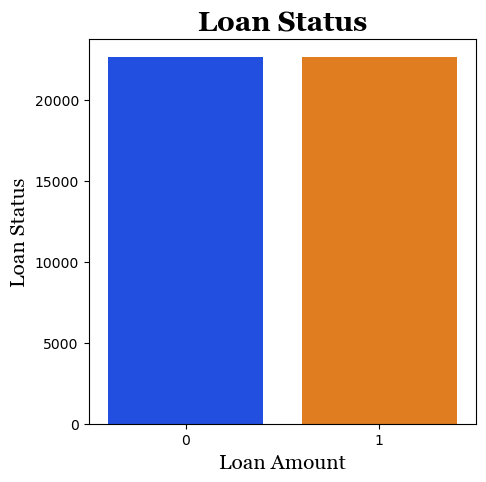

In [39]:
# Checking Whether Data got balanced
Loan_Status = y.value_counts()
plt.style.use('default')
plt.figure(figsize=(5, 5))
sns.barplot(x=Loan_Status.index, y=Loan_Status.values, palette='bright')
plt.title('Loan Status', fontdict={'fontname': 'Georgia', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Loan Amount', fontdict={'fontname': 'Georgia', 'fontsize': 15})
plt.ylabel('Loan Status', fontdict={'fontname': 'Georgia', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

# Model Evaluation:

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [42]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=42)
svm = SVC()

In [43]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

In [44]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.68      0.59      0.63      6832
           1       0.63      0.72      0.67      6752

    accuracy                           0.65     13584
   macro avg       0.66      0.65      0.65     13584
weighted avg       0.66      0.65      0.65     13584



LogisticRegression()

In [45]:
logreg.score(x_test,y_test)

0.6539310954063604

In [46]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.63      0.62      0.63      6832
           1       0.62      0.64      0.63      6752

    accuracy                           0.63     13584
   macro avg       0.63      0.63      0.63     13584
weighted avg       0.63      0.63      0.63     13584



DecisionTreeClassifier()

In [47]:
mymodel(rf)

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      6832
           1       0.66      0.69      0.68      6752

    accuracy                           0.67     13584
   macro avg       0.67      0.67      0.67     13584
weighted avg       0.67      0.67      0.67     13584



RandomForestClassifier(random_state=42)

In [48]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.70      0.52      0.60      6832
           1       0.62      0.78      0.69      6752

    accuracy                           0.65     13584
   macro avg       0.66      0.65      0.64     13584
weighted avg       0.66      0.65      0.64     13584



SVC()

# Hyperparameter Tuning using GridSearchCV
    

In [49]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV For Dicision tree: 

In [50]:
parameters={'max_depth':['none',10,20,30],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}
gs=GridSearchCV(dt,parameters,verbose=3)

In [51]:
gs.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=none, min_sampl

[CV 3/5] END max_depth=10, min_samples_leaf=4, min_samples_split=5;, score=0.658 total time=   0.3s
[CV 4/5] END max_depth=10, min_samples_leaf=4, min_samples_split=5;, score=0.647 total time=   0.4s
[CV 5/5] END max_depth=10, min_samples_leaf=4, min_samples_split=5;, score=0.668 total time=   0.4s
[CV 1/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.646 total time=   0.4s
[CV 2/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.656 total time=   0.4s
[CV 3/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.657 total time=   0.4s
[CV 4/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.646 total time=   0.4s
[CV 5/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.667 total time=   0.3s
[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2;, score=0.621 total time=   0.8s
[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2;, score=0.631 total time=   

[CV 5/5] END max_depth=30, min_samples_leaf=2, min_samples_split=10;, score=0.629 total time=   0.7s
[CV 1/5] END max_depth=30, min_samples_leaf=4, min_samples_split=2;, score=0.619 total time=   0.7s
[CV 2/5] END max_depth=30, min_samples_leaf=4, min_samples_split=2;, score=0.632 total time=   0.7s
[CV 3/5] END max_depth=30, min_samples_leaf=4, min_samples_split=2;, score=0.628 total time=   0.7s
[CV 4/5] END max_depth=30, min_samples_leaf=4, min_samples_split=2;, score=0.622 total time=   0.7s
[CV 5/5] END max_depth=30, min_samples_leaf=4, min_samples_split=2;, score=0.627 total time=   0.6s
[CV 1/5] END max_depth=30, min_samples_leaf=4, min_samples_split=5;, score=0.620 total time=   0.7s
[CV 2/5] END max_depth=30, min_samples_leaf=4, min_samples_split=5;, score=0.634 total time=   0.7s
[CV 3/5] END max_depth=30, min_samples_leaf=4, min_samples_split=5;, score=0.628 total time=   0.7s
[CV 4/5] END max_depth=30, min_samples_leaf=4, min_samples_split=5;, score=0.625 total time=   0.7s

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': ['none', 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=3)

# Getting best HyperParameters:

In [52]:
gs.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

# Getting best accuracy for Dicision tree as per Hyper tuned best Parameters:

In [53]:
dt=DecisionTreeClassifier(max_depth=10,min_samples_leaf=2,min_samples_split=2)
                          
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65      6832
           1       0.65      0.70      0.67      6752

    accuracy                           0.66     13584
   macro avg       0.66      0.66      0.66     13584
weighted avg       0.66      0.66      0.66     13584



# Conclusion: 

After analyzing the dataset and implementing various machine learning algorithms, the predictive model was successfully developed. The model demonstrated robust performance in predicting loan outcomes with high accuracy, precision, and recall. Key features contributing to loan approval or denial were identified, providing valuable insights for loan approval processes. Further refinements and validations may enhance the model's performance and applicability in real-world banking scenarios.

The final conclusion on the Bank Loan Prediction is that Random forest regression is working exceptionally well with accuracy of 0.67 on the data taken as compared to other models.